In [261]:
# RELOAD
# 파이썬 버전에 따라 상이할 수 있음
# import imp
# import test_package
# imp.reload(test_package)

<module 'test_package' from 'c:\\Users\\luck1\\Documents\\국비지원\\포트폴리오\\01_프로젝트1\\code\\test_package\\__init__.py'>

In [71]:
# 일단 기본적인 라이브러리 호출
import pandas as pd
import numpy as np

In [72]:
# get data
data = pd.read_csv("../전처리/전처리_최종_V3.csv", encoding="CP949")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [73]:
# 기준월 기준으로 데이터 그룹화
data_a = data.groupby(['기준월']).mean()

In [74]:
# 소비자 물가지수 차이 구하기 (a.k.a. 인플레이션 비율)
# 올해 소비자 물가지수 - 지난해 소비자물가지수 / 지난해 소비자 물가지수 * 100
data_a['인플레이션율'] = (data_a['소비자물가지수'].diff() / data_a['소비자물가지수'].shift(1)) * 100

# 확인 (불필요 시 주석처리)
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,조기상환율,CD금리,미국 실효금리,인플레이션율
기준월,,,,,,,,,,,,,,
2004-06,0.510000,5.040000,52.743,51.435,72.119,794.0,785.79,5.99,60.660000,34.530000,0.510000,3.91,1.03,NaN
2004-07,0.270000,5.020000,52.603,51.040,72.561,858.0,735.34,5.93,61.090000,29.270000,0.270000,3.91,1.26,0.612876
2004-08,0.270000,4.846667,52.394,50.554,73.191,842.0,803.57,5.80,60.920000,31.370000,0.270000,3.70,1.43,0.868235
2004-09,0.380000,4.700000,52.283,50.314,73.191,784.0,835.09,5.63,60.830000,32.417500,0.380000,3.52,1.61,0.000000
2004-10,0.508000,4.600000,52.157,50.090,73.191,801.0,834.84,5.57,60.896000,33.138000,0.508000,3.52,1.76,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.207,100.197,105.300,800.0,2699.18,3.88,60.585462,30.043799,0.929633,1.50,0.08,0.582673
2022-03,0.839380,2.477937,100.306,100.337,106.060,798.0,2757.65,3.84,60.576111,30.068175,0.825611,1.50,0.20,0.721747
2022-04,0.888984,2.463891,100.517,100.543,106.850,813.0,2695.05,3.90,60.578833,30.048621,0.892509,1.64,0.33,0.744861


- 데이터에 차분을 적용하는 것과 관련하여
- 만기전 상환율 : Target -> 건드리지 마
- 가중평균발행금리, 금리차, 조기상환율, LTV, DTI -> 건드리지 마
- 주택종합 매매가격지수, 전세가격지수 : lag 처리
- 실업자, 소비자물가지수 : lag 처리하고 log 처리
- 예금은행대출금리, CD금리, 코스피 : lag 처리 하고 log 차분

In [75]:
data_a['주택종합 매매가격지수'] = data_a['주택종합 매매가격지수'].shift(1)
data_a['주택종합 전세가격지수'] = data_a['주택종합 전세가격지수'].shift(1)
data_a["예금은행 대출금리"] = np.log(data_a["예금은행 대출금리"]).shift(1)
data_a["소비자물가지수"] = np.log(data_a["소비자물가지수"]).shift(1)
data_a["코스피 월별 종가"] = np.log(data_a["코스피 월별 종가"]).shift(1)
data_a["15-64 실업자 수"] = np.log(data_a["15-64 실업자 수"]).shift(1)
data_a["CD금리"] = np.log(data_a["CD금리"]).shift(1)
data_a['미국 실효금리'] = data_a['미국 실효금리'].shift(1)

In [76]:
# 결측치 및 중복컬럼 삭제
data_a.dropna(inplace=True)
data_a.drop(columns=['조기상환율'], inplace=True)

In [77]:
# 중간확인 (불필요 시 주석처리 or 삭제)
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
기준월,,,,,,,,,,,,,
2004-07,0.270000,5.020000,52.743,51.435,4.278318,6.677083,6.666690,1.790091,61.090000,29.270000,1.363537,1.03,0.612876
2004-08,0.270000,4.846667,52.603,51.040,4.284428,6.754604,6.600333,1.780024,60.920000,31.370000,1.363537,1.26,0.868235
2004-09,0.380000,4.700000,52.394,50.554,4.293072,6.735780,6.689064,1.757858,60.830000,32.417500,1.308333,1.43,0.000000
2004-10,0.508000,4.600000,52.283,50.314,4.293072,6.664409,6.727540,1.728109,60.896000,33.138000,1.258461,1.61,0.000000
2004-11,0.358333,4.515000,52.157,50.090,4.293072,6.685861,6.727240,1.717395,60.976667,33.403333,1.258461,1.76,-0.602533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.000,100.000,4.651004,6.659294,7.887336,1.348073,60.585462,30.043799,0.329304,0.08,0.582673
2022-03,0.839380,2.477937,100.207,100.197,4.656813,6.684612,7.900703,1.355835,60.576111,30.068175,0.405465,0.08,0.721747
2022-04,0.888984,2.463891,100.306,100.337,4.664005,6.682109,7.922134,1.345472,60.578833,30.048621,0.405465,0.20,0.744861


# 기초통계량 1차 분석

In [78]:
# 데이터프레임의 정보, 결측치 확인
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 2004-07 to 2022-06
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   만기전상환율       214 non-null    float64
 1   가중평균발행금리     214 non-null    float64
 2   주택종합 매매가격지수  214 non-null    float64
 3   주택종합 전세가격지수  214 non-null    float64
 4   소비자물가지수      214 non-null    float64
 5   15-64 실업자 수  214 non-null    float64
 6   코스피 월별 종가    214 non-null    float64
 7   예금은행 대출금리    214 non-null    float64
 8   평균 LTV       214 non-null    float64
 9   평균 DTI       214 non-null    float64
 10  CD금리         214 non-null    float64
 11  미국 실효금리      214 non-null    float64
 12  인플레이션율       214 non-null    float64
dtypes: float64(13)
memory usage: 23.4+ KB


In [79]:
# 결측치 확인
data_a.isna().sum()

만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
미국 실효금리        0
인플레이션율         0
dtype: int64

In [80]:
# 기초 통계 조회
data_a.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.125790,3.773027,70.835033,72.083953,4.496383,6.771244,7.513644,1.415123,59.874064,32.485376,0.866499,1.284953,0.190444
std,1.295680,0.954468,11.059051,15.072584,0.106253,0.131812,0.288032,0.314779,1.158292,1.313916,0.542269,1.637986,0.352039
min,0.037500,2.447768,51.567000,49.086000,4.278318,6.527958,6.600333,0.871293,57.812188,29.270000,-0.462035,0.050000,-0.744313
25%,1.236738,2.869294,63.628000,56.417250,4.414212,6.677712,7.395603,1.152934,59.055704,31.498212,0.490109,0.110000,-0.067598
50%,1.748847,3.411875,70.716000,73.672000,4.531157,6.748760,7.583812,1.360977,59.968668,32.773154,0.974560,0.285000,0.181225
75%,2.753005,4.801858,77.204250,85.564000,4.584640,6.856462,7.652164,1.695616,60.562161,33.592059,1.264127,2.007500,0.404551
max,9.681872,5.236765,100.768000,100.814000,4.678049,7.078342,8.100671,2.025513,62.019524,34.461733,1.796747,5.260000,1.188525


In [81]:
# 아주 간단하게 상관관계 분석
data_a.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
만기전상환율,1.000000,-0.212187,0.071402,0.212557,0.265383,0.091006,0.221319,-0.333767,-0.471657,0.328658,-0.120067,-0.416383,-0.208592
가중평균발행금리,-0.212187,1.000000,-0.859188,-0.960978,-0.905004,-0.408910,-0.737516,0.945414,0.087004,0.622796,0.877357,0.446123,0.122854
주택종합 매매가격지수,0.071402,-0.859188,1.000000,0.950540,0.935405,0.224822,0.863680,-0.750758,-0.152847,-0.665767,-0.807315,-0.500821,0.013417
주택종합 전세가격지수,0.212557,-0.960978,0.950540,1.000000,0.966397,0.332931,0.842150,-0.882945,-0.166292,-0.623201,-0.852136,-0.512345,-0.072632
소비자물가지수,0.265383,-0.905004,0.935405,0.966397,1.000000,0.327146,0.871575,-0.843832,-0.359738,-0.501414,-0.809405,-0.618408,-0.098710
15-64 실업자 수,0.091006,-0.408910,0.224822,0.332931,0.327146,1.000000,0.187947,-0.489313,0.009945,-0.334774,-0.488598,-0.140864,-0.101409
코스피 월별 종가,0.221319,-0.737516,0.863680,0.842150,0.871575,0.187947,1.000000,-0.656381,-0.295453,-0.482773,-0.658527,-0.394599,0.015323
예금은행 대출금리,-0.333767,0.945414,-0.750758,-0.882945,-0.843832,-0.489313,-0.656381,1.000000,0.104470,0.583704,0.902146,0.450597,0.166505
평균 LTV,-0.471657,0.087004,-0.152847,-0.166292,-0.359738,0.009945,-0.295453,0.104470,1.000000,-0.435826,0.068336,0.749010,0.061039
평균 DTI,0.328658,0.622796,-0.665767,-0.623201,-0.501414,-0.334774,-0.482773,0.583704,-0.435826,1.000000,0.704716,-0.060873,-0.065775


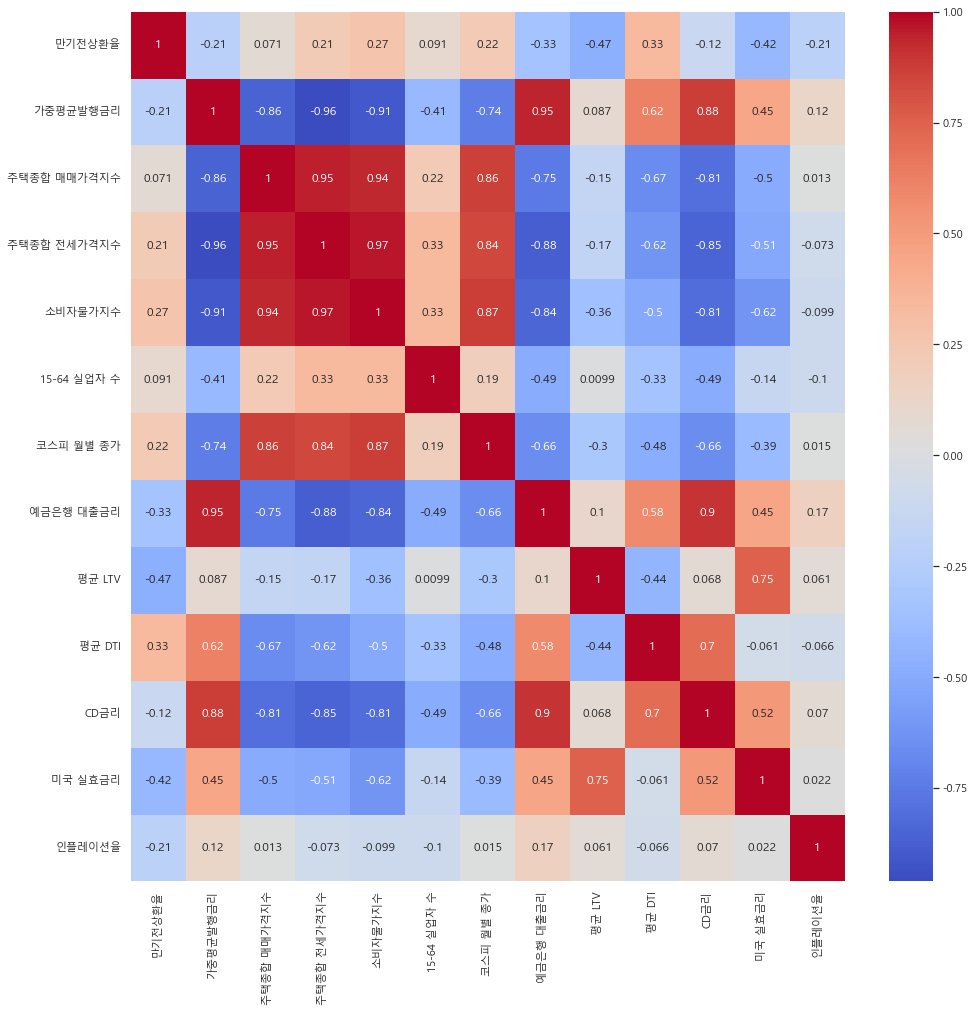

In [82]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

In [83]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_a.values, i) for i in range(data_a.shape[1])]
vif["features"] = data_a.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,39924.860803,소비자물가지수
1,8570.247376,평균 LTV
2,7383.661484,코스피 월별 종가
3,5235.063735,평균 DTI
4,4868.500402,15-64 실업자 수
5,2483.342242,주택종합 전세가격지수
6,1655.691072,주택종합 매매가격지수
7,869.035798,가중평균발행금리
8,721.193531,예금은행 대출금리
9,78.468979,CD금리


In [84]:
# test_package의 find_vif를 활용하는 방법

from test_package import find_vif
find_vif(data_a)

      VIF Factor     features
0   39924.860803      소비자물가지수
1    8570.247376       평균 LTV
2    7383.661484    코스피 월별 종가
3    5235.063735       평균 DTI
4    4868.500402  15-64 실업자 수
5    2483.342242  주택종합 전세가격지수
6    1655.691072  주택종합 매매가격지수
7     869.035798     가중평균발행금리
8     721.193531    예금은행 대출금리
9      78.468979         CD금리
10     19.453720      미국 실효금리
11     12.104846       만기전상환율
12      1.583485       인플레이션율


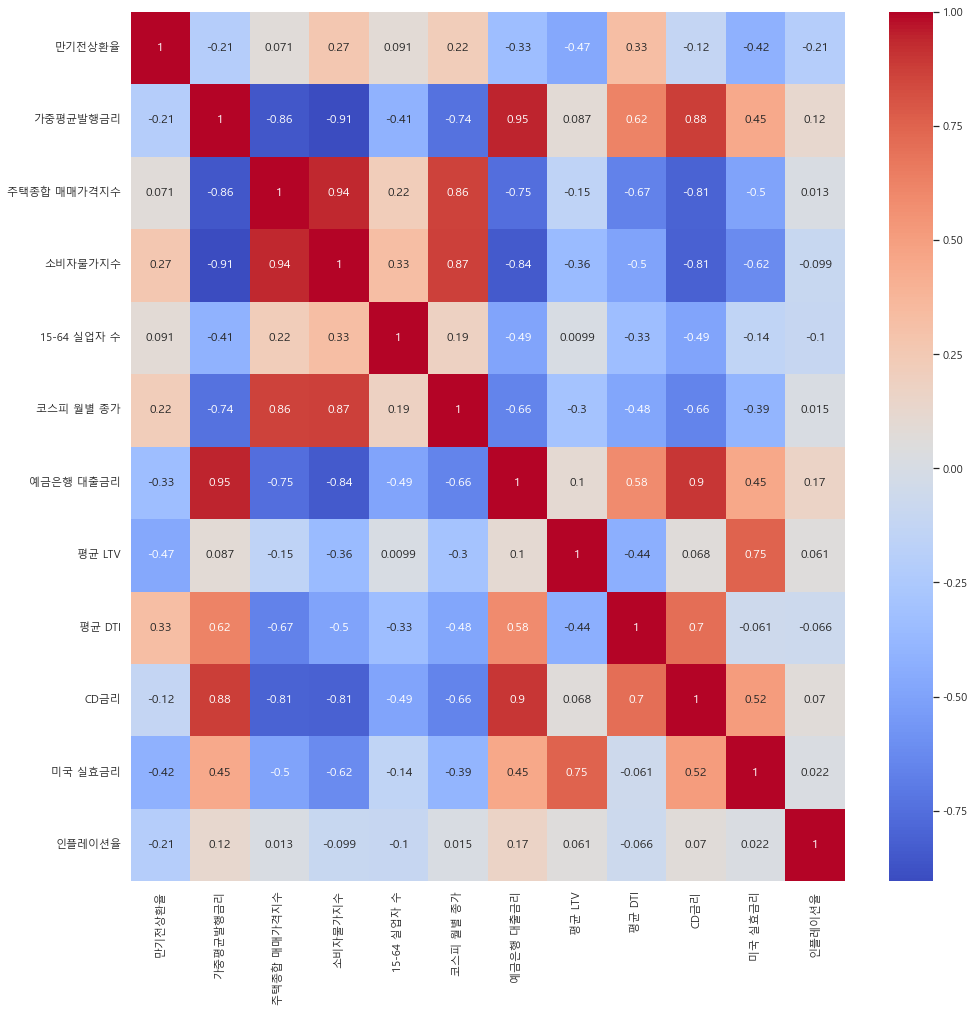

In [85]:
# 일단 주택 관련 지수는 매매가격만 있으면 충분할 것 같아요
data_b = data_a.copy()
data_b.drop(columns=['주택종합 전세가격지수'], inplace=True)

# 상관관계 재확인
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_b.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

In [86]:
# VIF 재확인
find_vif(data_b)

      VIF Factor     features
0   38477.562087      소비자물가지수
1    8524.060190       평균 LTV
2    7171.024363    코스피 월별 종가
3    4985.318975       평균 DTI
4    4866.474395  15-64 실업자 수
5    1058.030955  주택종합 매매가격지수
6     720.181712    예금은행 대출금리
7     366.245823     가중평균발행금리
8      72.461495         CD금리
9      18.827480      미국 실효금리
10     11.342244       만기전상환율
11      1.582310       인플레이션율


#### Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씁니다
- Robuster : 아웃라이어를 없애버림 -> 데이터 특성에 따라 아웃라이어가 존재하는 게 의미있을 수도 있으니 못 씁니다
- Min-Max : 아웃라이어 살리고 데이터 분포 살리고 (남는 게 이거 뿐이네요)

In [87]:
# Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler

data_c = data_b.copy().reset_index()

scaler = MinMaxScaler()
mm_temp = data_c.drop(columns=['기준월','만기전상환율'])
colnames = data_c.columns.drop(['기준월','만기전상환율'])

# Training
# scaler.fit(mm_df)

# Traning & Scaling
mm_data = scaler.fit_transform(mm_temp)

mm_result = pd.DataFrame(mm_data, columns=colnames)
mm_result

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
0,0.922279,0.023902,0.000000,0.270948,0.044228,0.796034,0.779071,0.000000,0.808211,0.188100,0.702174
1,0.860130,0.021056,0.015285,0.411797,0.000000,0.787312,0.738665,0.404489,0.808211,0.232246,0.834290
2,0.807542,0.016809,0.036912,0.377595,0.059141,0.768107,0.717274,0.606252,0.783771,0.264875,0.385088
3,0.771687,0.014553,0.036912,0.247920,0.084785,0.742334,0.732961,0.745031,0.761692,0.299424,0.385088
4,0.741210,0.011992,0.036912,0.286896,0.084586,0.733051,0.752134,0.796137,0.761692,0.328215,0.073353
...,...,...,...,...,...,...,...,...,...,...,...
209,0.011105,0.984391,0.932341,0.238626,0.857809,0.413075,0.659152,0.149045,0.350339,0.005758,0.686548
210,0.010817,0.988598,0.946876,0.284627,0.866718,0.419800,0.656930,0.153740,0.384057,0.005758,0.758501
211,0.005781,0.990610,0.964867,0.280079,0.881002,0.410822,0.657576,0.149973,0.384057,0.028791,0.770460
212,0.000000,0.994898,0.983432,0.313914,0.865698,0.424255,0.650819,0.141091,0.423561,0.053743,0.728874


In [88]:
# Min-Max 스케일링 잘 됐는지 확인 겸 통계 데이터 확인
mm_result.describe()

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.475174,0.391619,0.545529,0.442031,0.608737,0.471166,0.490067,0.619326,0.588164,0.237035,0.483619
std,0.342226,0.224773,0.265811,0.239491,0.191978,0.272720,0.275303,0.253078,0.240071,0.314393,0.182136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151139,0.245137,0.339965,0.272091,0.530060,0.244010,0.295559,0.429185,0.421530,0.011516,0.350115
50%,0.345682,0.389199,0.632525,0.401178,0.655505,0.424255,0.512553,0.674756,0.636004,0.045106,0.478849
75%,0.844064,0.521072,0.766320,0.596864,0.701062,0.714181,0.653614,0.832489,0.764200,0.375720,0.594392
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
# 설마 결측치 없겠죠
mm_result.isna().sum()

가중평균발행금리       0
주택종합 매매가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
미국 실효금리        0
인플레이션율         0
dtype: int64

In [90]:
# 최적의 알파값을 찾기 위한 GridSearch 수행
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# ...을 하기 전에 피처랑 타겟 설정
feature_data = mm_result # ALL

# 주요 요인 별로 나눈 이유 -> 위에서 VIF를 보시면 아시겠지만...
feature_data_A = mm_result[['가중평균발행금리', '예금은행 대출금리', '미국 실효금리']] # 금리 요인
feature_data_B = mm_result[['주택종합 매매가격지수', '평균 LTV', '평균 DTI']] # 부동산 요인
feature_data_C = mm_result[['15-64 실업자 수', '인플레이션율', '코스피 월별 종가']] # 거시경제 요인
target = data_a['만기전상환율']

In [91]:
# VIF after Min-Max Scaling
# 확실히 스케일링을 해주니까 공선성이 개선이 되긴 된 것 같...다...

find_vif(feature_data)
print('\n')
find_vif(feature_data_A)
print('\n')
find_vif(feature_data_B)
print('\n')
find_vif(feature_data_C)

    VIF Factor     features
0   247.579266      소비자물가지수
1   169.667705  주택종합 매매가격지수
2   124.347743         CD금리
3    97.544781    예금은행 대출금리
4    96.017723    코스피 월별 종가
5    51.030699     가중평균발행금리
6    47.691013       평균 DTI
7    17.435485       평균 LTV
8    16.309239      미국 실효금리
9     9.462446       인플레이션율
10    7.589399  15-64 실업자 수


   VIF Factor   features
0   24.645098  예금은행 대출금리
1   24.338242   가중평균발행금리
2    1.980578    미국 실효금리


   VIF Factor     features
0    2.659064       평균 LTV
1    2.375083       평균 DTI
2    2.321795  주택종합 매매가격지수


   VIF Factor     features
0    7.141412    코스피 월별 종가
1    5.110120       인플레이션율
2    4.081643  15-64 실업자 수


In [92]:
# 좋습니다 이제 알파를 찾아봅시다

from test_package import find_best_alpha
# find_best_alpha(type, data, target)
# type : ridge, lasso, elastic

find_best_alpha('ridge', feature_data[:161], target[:161])
find_best_alpha('lasso', feature_data[:161], target[:161])
find_best_alpha('elastic', feature_data[:161], target[:161])

find_best_alpha('ridge', feature_data_A[:161], target[:161])
find_best_alpha('lasso', feature_data_A[:161], target[:161])
find_best_alpha('elastic', feature_data_A[:161], target[:161])

find_best_alpha('ridge', feature_data_B[:161], target[:161])
find_best_alpha('lasso', feature_data_B[:161], target[:161])
find_best_alpha('elastic', feature_data_B[:161], target[:161])

find_best_alpha('ridge', feature_data_C[:161], target[:161])
find_best_alpha('lasso', feature_data_C[:161], target[:161])
find_best_alpha('elastic', feature_data_C[:161], target[:161])

Type : ridge | {'alpha': 1.0} | MSE : 0.30841606969261975 | RMSE: 0.5553522032842039
Type : lasso | {'alpha': 0.01} | MSE : 0.06620879795201255 | RMSE: 0.25731070314313115
Type : elastic | {'alpha': 0.01} | MSE : 0.07522351608721681 | RMSE: 0.2742690578377678
Type : ridge | {'alpha': 1.0} | MSE : 0.3398030304538878 | RMSE: 0.5829262650231912
Type : lasso | {'alpha': 0.02} | MSE : 0.2772897994115151 | RMSE: 0.5265831362771838
Type : elastic | {'alpha': 0.01} | MSE : 0.31245777078933806 | RMSE: 0.5589792221445606
Type : ridge | {'alpha': 1.0} | MSE : 2.303702039188059 | RMSE: 1.5177951242470307
Type : lasso | {'alpha': 0.04} | MSE : 2.060709921739903 | RMSE: 1.435517301093896
Type : elastic | {'alpha': 0.02} | MSE : 2.2534023118446855 | RMSE: 1.5011336755414841
Type : ridge | {'alpha': 0.24} | MSE : 1.801165039298644 | RMSE: 1.342074900778136
Type : lasso | {'alpha': 0.01} | MSE : 1.9356329844828846 | RMSE: 1.3912702772944172
Type : elastic | {'alpha': 0.01} | MSE : 1.9762840605631222 | 

In [93]:
# 요인 별 RMSE 스코어 계산

import test_package as tp
# Hand-made Function
# tp.score_checker(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'

print('전체 요인')
tp.score_checker('ridge', feature_data[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data[:161], target[:161], 0.01)
tp.score_checker('elastic', feature_data[:161], target[:161], 0.01)

print('\n금리 요인')
tp.score_checker('ridge', feature_data_A[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data_A[:161], target[:161], 0.02)
tp.score_checker('elastic', feature_data_A[:161], target[:161], 0.01)

print('\n부동산 요인\n')
tp.score_checker('ridge', feature_data_B[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data_B[:161], target[:161], 0.04)
tp.score_checker('elastic', feature_data_B[:161], target[:161], 0.02)

print('\n거시경제 요인')
tp.score_checker('ridge', feature_data_C[:161], target[:161], 0.24)
tp.score_checker('lasso', feature_data_C[:161], target[:161], 0.01)
tp.score_checker('elastic', feature_data_C[:161], target[:161], 0.01)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..

전체 요인
Alpha : 1.0
ridge Negative MSE score : [0.685 0.166 0.091 1.168 3.938]
ridge RMSE scores : [0.827 0.407 0.302 1.081 1.984]
ridge AVG RMSE : 0.920

Alpha : 0.01
lasso Negative MSE score : [0.693 0.051 0.071 1.077 3.373]
lasso RMSE scores : [0.832 0.226 0.266 1.038 1.837]
lasso AVG RMSE : 0.840

Alpha : 0.01
elastic Negative MSE score : [0.561 0.097 0.078 1.159 3.589]
elastic RMSE scores : [0.749 0.311 0.279 1.077 1.894]
elastic AVG RMSE : 0.862


금리 요인
Alpha : 1.0
ridge Negative MSE score : [0.665 0.155 0.168 1.431 3.144]
ridge RMSE scores : [0.816 0.394 0.41  1.196 1.773]
ridge AVG RMSE : 0.918

Alpha : 0.02
lasso Negative MSE score : [0.636 0.112 0.197 1.448 3.056]
lasso RMSE scores : [0.797 0.335 0.444 1.203 1.748]
lasso AVG RMSE : 0.905

Alpha : 0.01
elastic Negative MSE score : [0.648 0.146 0.167 1.427 3.154]
elastic RMSE scores : [0.805 0.381 0.409 1.195 1.776]
elastic AVG RMSE : 0.913


부동산 요인

Alpha : 1.0
ridge Negative MSE score : [0.341 1.219 0.683 1.91  3.485]
ridge RMS

In [94]:
# Train Set : Test Set = 75% : 25%
# Test SET 20%일 경우 코로나 시국 데이터가 좀 더 반영됨

# feature_data_A : 금리 요인 (alpha = 0.01)
# feature_data_B : 부동산 요인 (alpha = 0.02)
# feature_data_C : 거시경제 요인 (alpha = 0.01)
# feature_data : 모든 요인 고려 (alpha = 0.01)

###########################################
# 가장 잘 나온 모델로 예측이라는 걸 해봅시다 #
###########################################

xa_train, xa_test, ya_train, ya_test = train_test_split(feature_data_A, target, test_size=0.25, random_state=25)
xa_model = ElasticNet(alpha=0.03, random_state=25)
xa_model.fit(xa_train, ya_train)
xa_pred = xa_model.predict(xa_test)

xb_train, xb_test, yb_train, yb_test = train_test_split(feature_data_B, target, test_size=0.25, random_state=25)
xb_model = ElasticNet(alpha=0.02, random_state=25)
xb_model.fit(xb_train, yb_train)
xb_pred = xb_model.predict(xb_test)

xc_train, xc_test, yc_train, yc_test = train_test_split(feature_data_C, target, test_size=0.25, random_state=25)
xc_model = ElasticNet(alpha=0.01, random_state=25)
xc_model.fit(xc_train, yc_train)
xc_pred = xc_model.predict(xc_test)

xd_train, xd_test, yd_train, yd_test = train_test_split(feature_data, target, test_size=0.25, random_state=25)
xd_model = ElasticNet(alpha=0.03, random_state=25)
xd_model.fit(xd_train, yd_train)
xd_pred = xd_model.predict(xd_test)

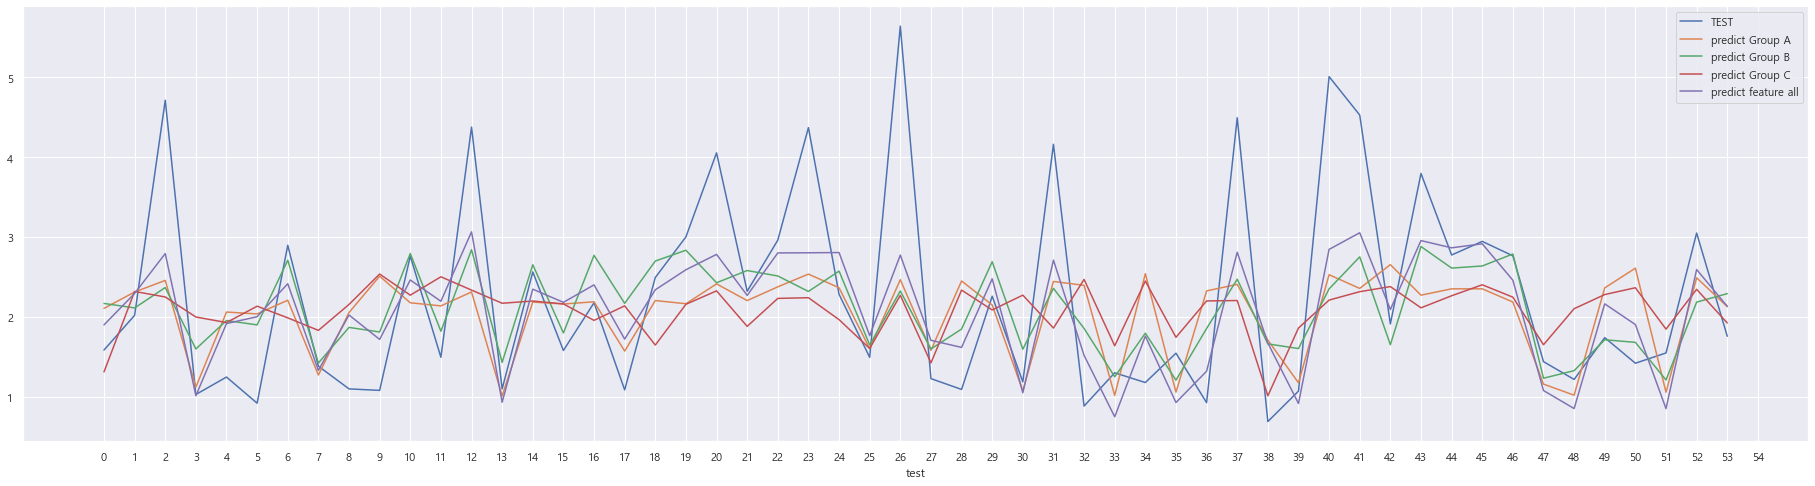

In [165]:
# 쟤네를 그려보면 이렇게 됩니다
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yd_test, label="TEST")
plt.plot(xa_pred, label="predict Group A")
plt.plot(xb_pred, label="predict Group B")
plt.plot(xc_pred, label="predict Group C")
plt.plot(xd_pred, label="predict feature all")

plt.legend(loc='upper right')
plt.show()

- 따로따로 봅시다

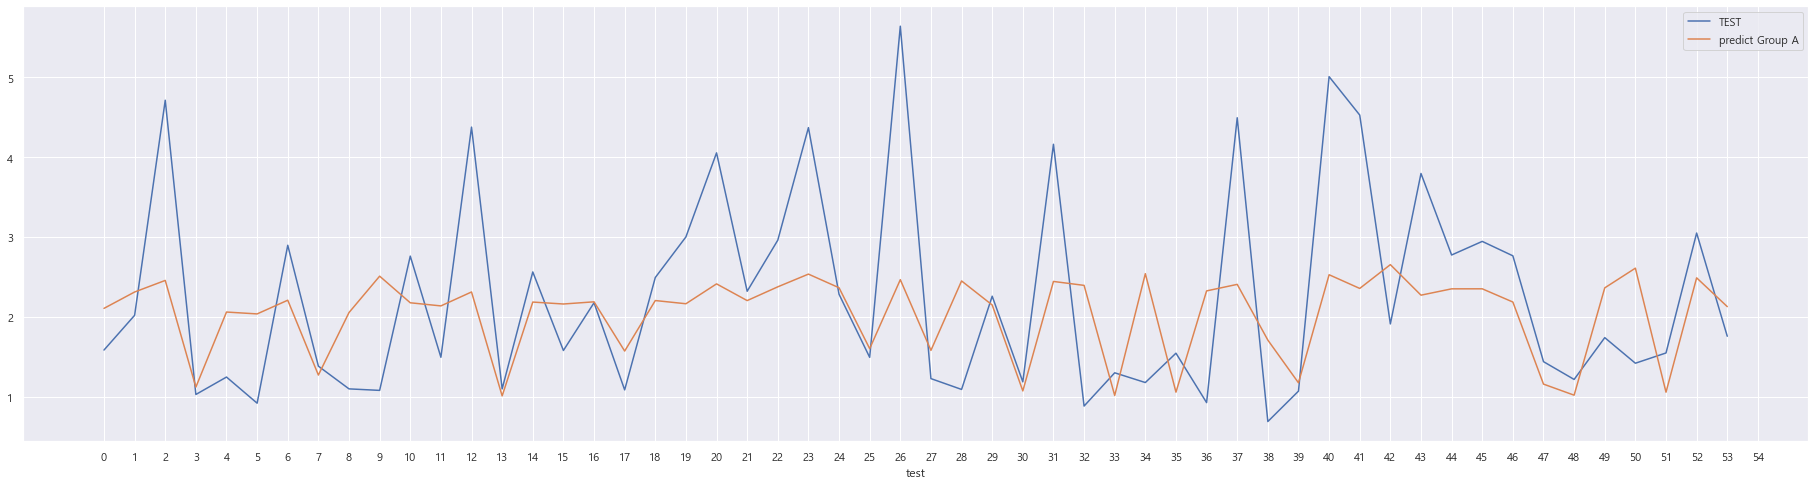

In [159]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(ya_test, label="TEST")
plt.plot(xa_pred, label="predict Group A")
plt.legend(loc='upper right')
plt.show()

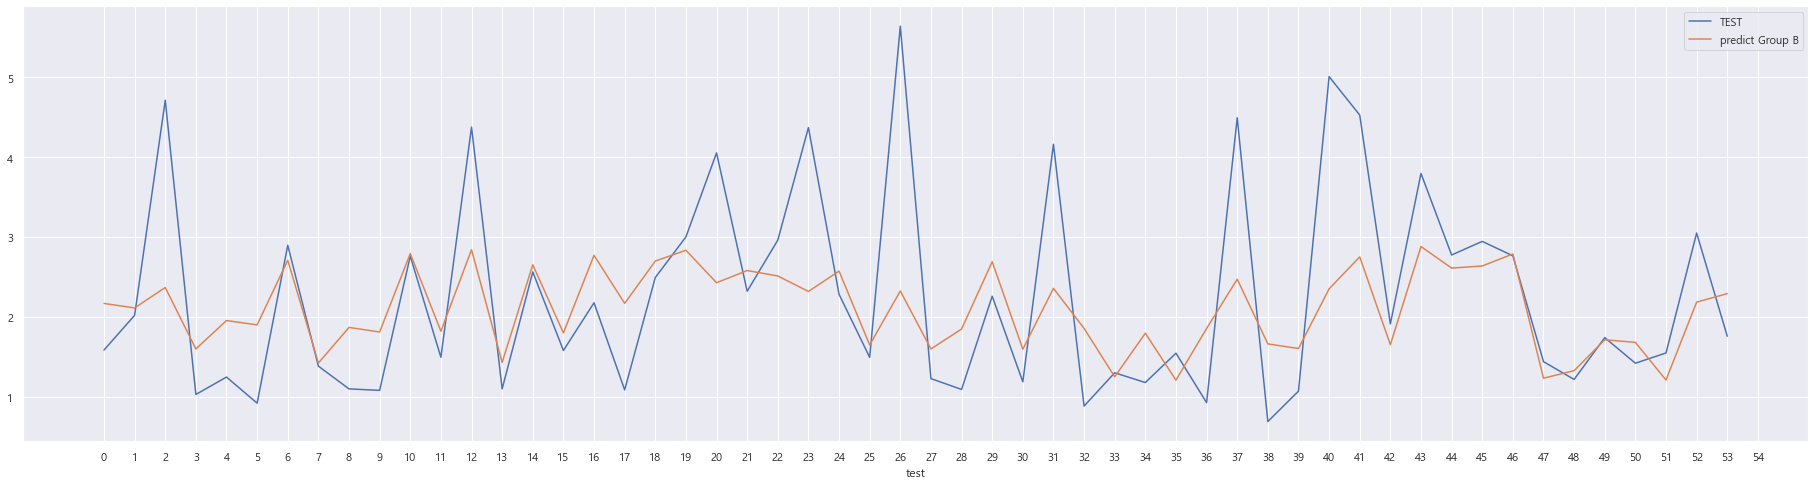

In [160]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yb_test, label="TEST")
plt.plot(xb_pred, label="predict Group B")
plt.legend(loc='upper right')
plt.show()

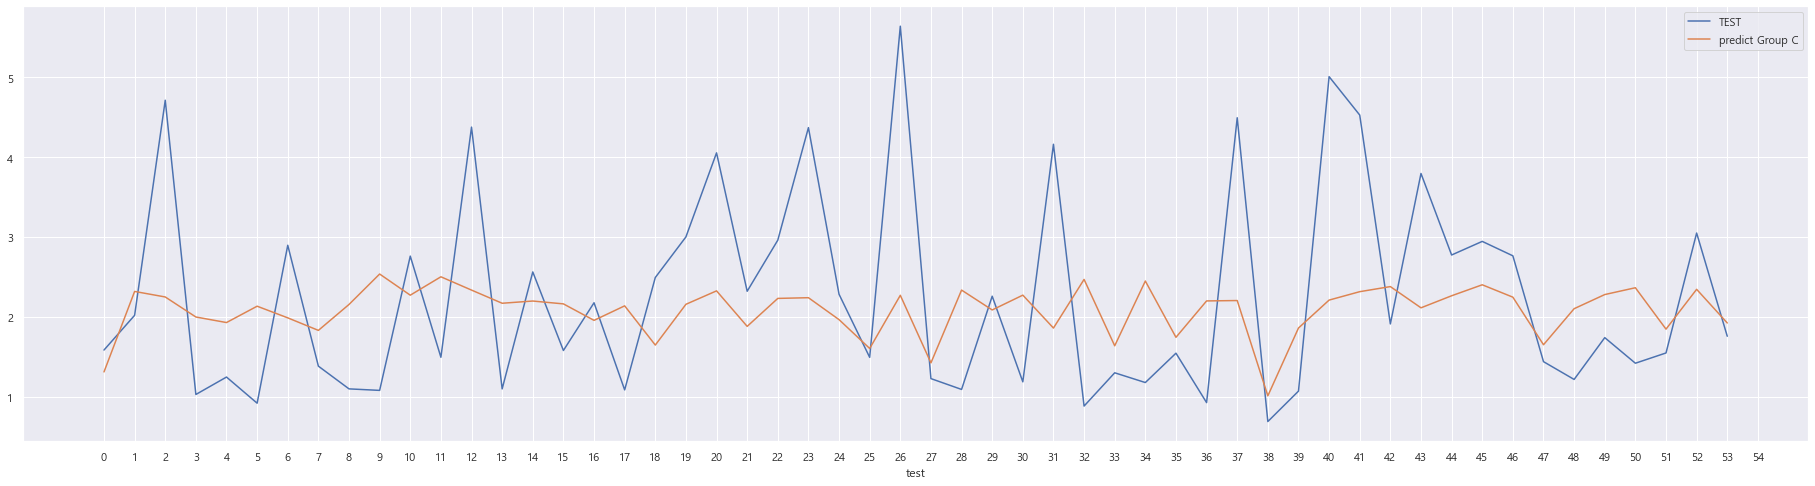

In [161]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yc_test, label="TEST")
plt.plot(xc_pred, label="predict Group C")
plt.legend(loc='upper right')
plt.show()

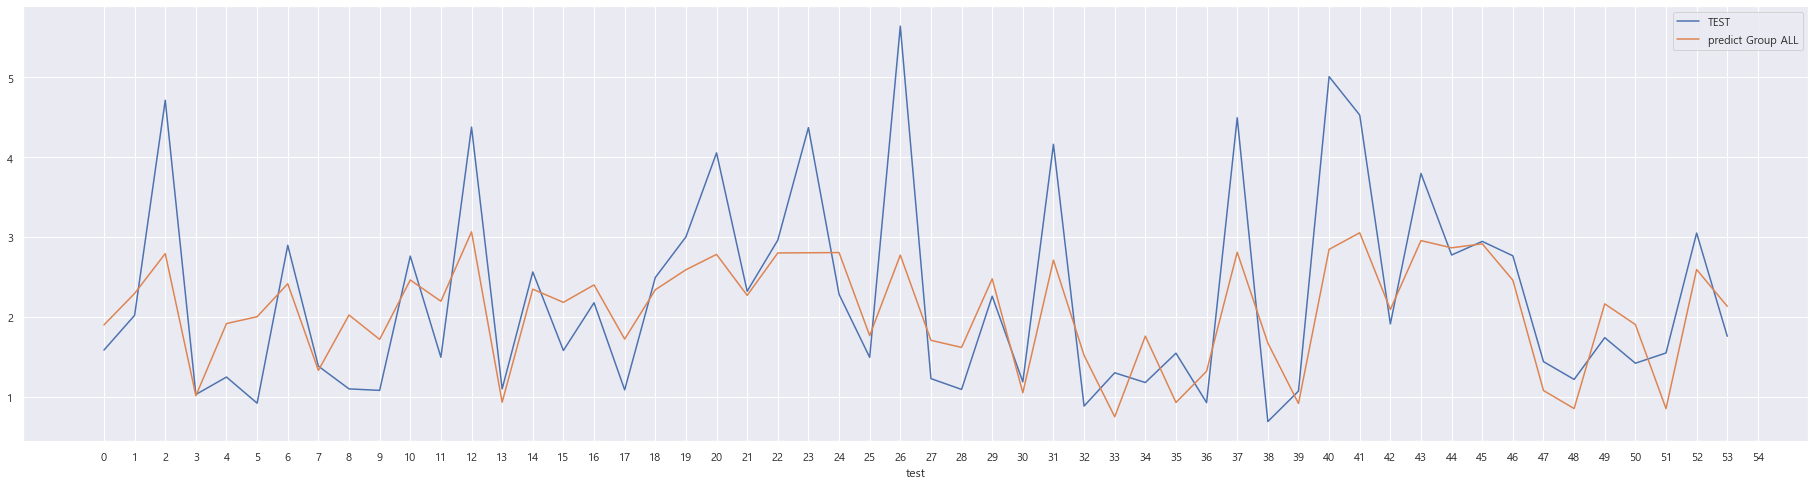

In [162]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yd_test, label="TEST")
plt.plot(xd_pred, label="predict Group ALL")
plt.legend(loc='upper right')
plt.show()

In [100]:
# 그래서 RMSE가 얼마나 나왔을까

from sklearn.metrics import mean_squared_error, accuracy_score

mse_a = mean_squared_error(ya_test, xa_pred)
rmse_a = mse_a ** 0.5

mse_b = mean_squared_error(yb_test, xb_pred)
rmse_b = mse_b ** 0.5

mse_c = mean_squared_error(yc_test, xc_pred)
rmse_c = mse_c ** 0.5

mse_all = mean_squared_error(yd_test, xd_pred)
rmse_all = mse_all ** 0.5

print(f'금리 요인 RMSE : {rmse_a:.3f}')
print(f'부동산 요인 RMSE : {rmse_b:.3f}')
print(f'거시경제 요인 RMSE : {rmse_c:.3f}')
print(f'전체 요인 RMSE : {rmse_all:.3f}')

금리 요인 RMSE : 1.120
부동산 요인 RMSE : 1.015
거시경제 요인 RMSE : 1.231
전체 요인 RMSE : 0.864


- 위에 있는 건 아까 best alpha 구했을 때하고 비교하면 좋을 거 같고

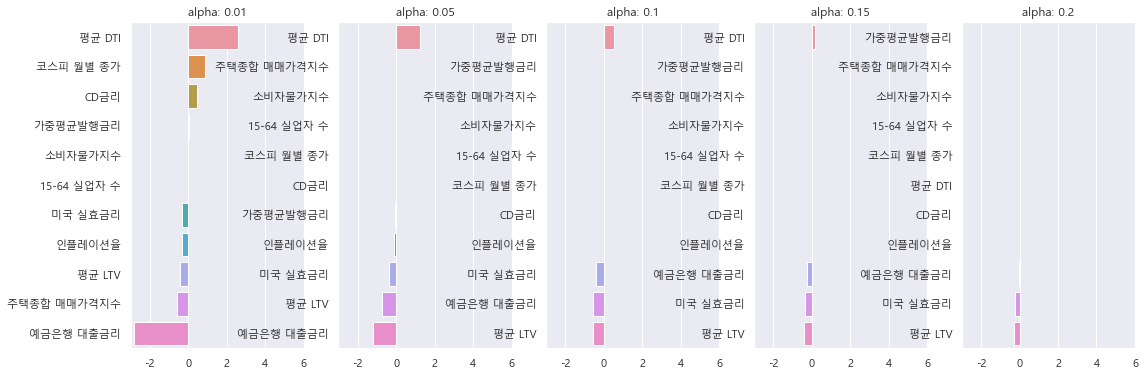

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
평균 DTI          2.572433     1.217495    0.531442     0.195661    0.000000
코스피 월별 종가       0.851294     0.000000    0.000000     0.000000    0.000000
CD금리            0.461104     0.000000   -0.000000    -0.000000   -0.000000
가중평균발행금리        0.030100    -0.047805   -0.000000    -0.000000   -0.000000
소비자물가지수        -0.000000     0.000000    0.000000     0.000000    0.000000
15-64 실업자 수    -0.000000     0.000000    0.000000     0.000000    0.000000
미국 실효금리        -0.319181    -0.350296   -0.389577    -0.327146   -0.245366
인플레이션율         -0.339491    -0.131038   -0.000000    -0.000000   -0.000000
평균 LTV         -0.441155    -0.727438   -0.573190    -0.422991   -0.292807
주택종합 매매가격지수    -0.582117    -0.000000   -0.000000     0.000000    0.000000
예금은행 대출금리      -2.838360    -1.179304   -0.558288    -0.230504   -0.032564


In [136]:
# 문득 이런 생각
# Best alpha로 RMSE를 찾긴 찾았는데
# 그래프 뭐가 대충 일치하는 게 보였어. 근데 전체 요인이 Best야
# 알파를 좀 더 변화시켜보자. 뭐가 큰 영향을 준 걸까.
# 이거도 요인 별로 하나하나 돌려봅시다

from test_package import check_coeff

# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data, target, alphas)

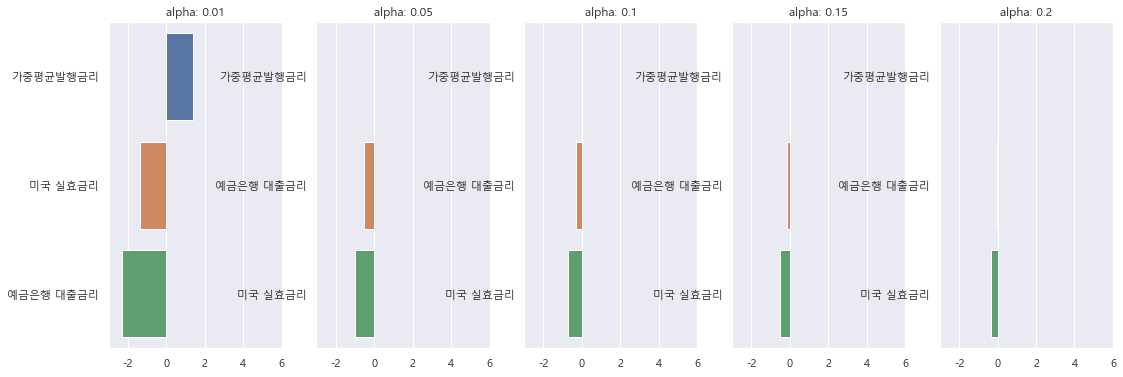

           alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
가중평균발행금리      1.382691     0.000000   -0.000000    -0.000000   -0.000000
미국 실효금리      -1.371280    -0.995368   -0.717645    -0.507067   -0.342208
예금은행 대출금리    -2.291472    -0.546432   -0.320829    -0.153593   -0.024301


In [102]:
# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data_A, target, alphas)

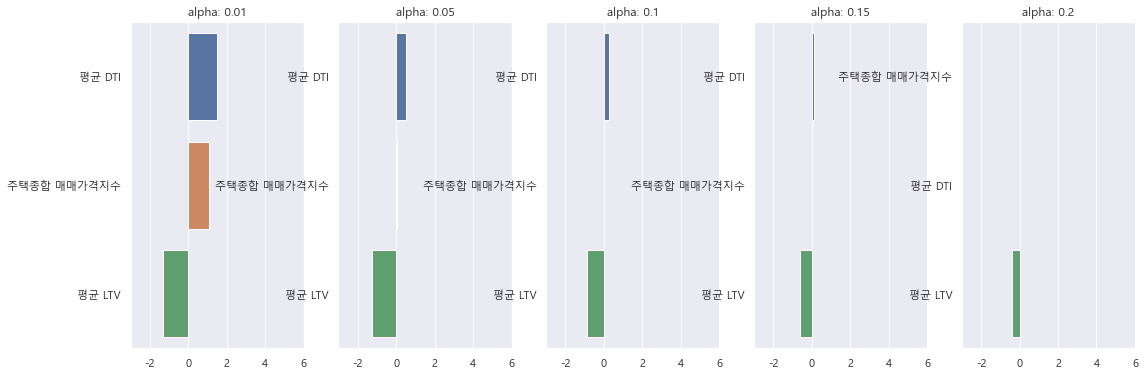

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
평균 DTI          1.487378     0.517204    0.272063     0.103193    0.000000
주택종합 매매가격지수     1.070551     0.044402    0.000000     0.000000    0.000000
평균 LTV         -1.335536    -1.258574   -0.870820    -0.593851   -0.384502


In [103]:
# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data_B, target, alphas)

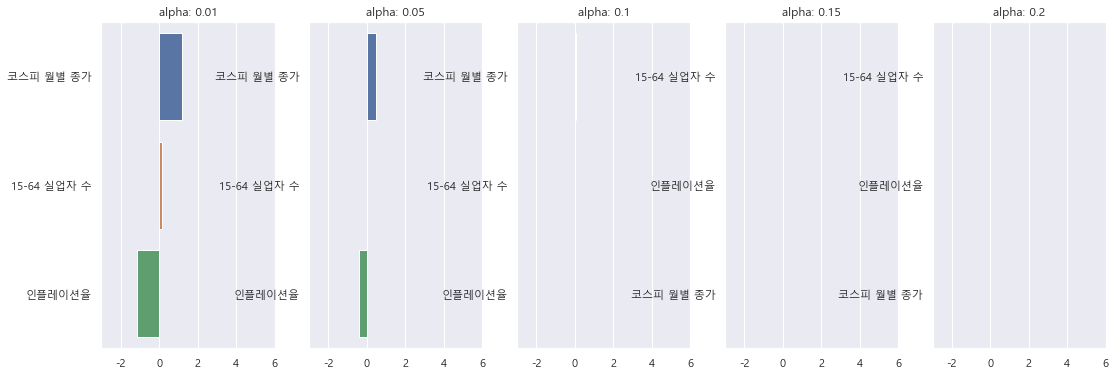

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
코스피 월별 종가       1.183402     0.486630    0.055305          0.0         0.0
15-64 실업자 수     0.126042     0.000000    0.000000          0.0         0.0
인플레이션율         -1.159219    -0.418058   -0.000000         -0.0        -0.0


In [104]:
# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data_C, target, alphas)

In [105]:
feature_data_best = feature_data[['평균 LTV', '평균 DTI', '예금은행 대출금리', '미국 실효금리']]
feature_data_best

,평균 LTV,평균 DTI,예금은행 대출금리,미국 실효금리
0,0.779071,0.000000,0.796034,0.188100
1,0.738665,0.404489,0.787312,0.232246
2,0.717274,0.606252,0.768107,0.264875
3,0.732961,0.745031,0.742334,0.299424
4,0.752134,0.796137,0.733051,0.328215
...,...,...,...,...
209,0.659152,0.149045,0.413075,0.005758
210,0.656930,0.153740,0.419800,0.005758
211,0.657576,0.149973,0.410822,0.028791
212,0.650819,0.141091,0.424255,0.053743


In [116]:
from test_package import score_checker


find_best_alpha('elastic', feature_data_best[:161], target[:161])
score_checker('elastic', feature_data_best[:161], target[:161], 0.01)

Type : elastic | {'alpha': 0.01} | MSE : 0.06407534591350476 | RMSE: 0.2531310844473763
Alpha : 0.01
elastic Negative MSE score : [0.6   0.098 0.092 1.2   2.689]
elastic RMSE scores : [0.775 0.313 0.304 1.096 1.64 ]
elastic AVG RMSE : 0.825



In [117]:
# Best Feature Training
xe_train, xe_test, ye_train, ye_test = train_test_split(feature_data_best, target, test_size=0.25, random_state=25)
xe_model = ElasticNet(alpha=0.01, random_state=25)
xe_model.fit(xe_train, ye_train)
xe_pred = xe_model.predict(xe_test)

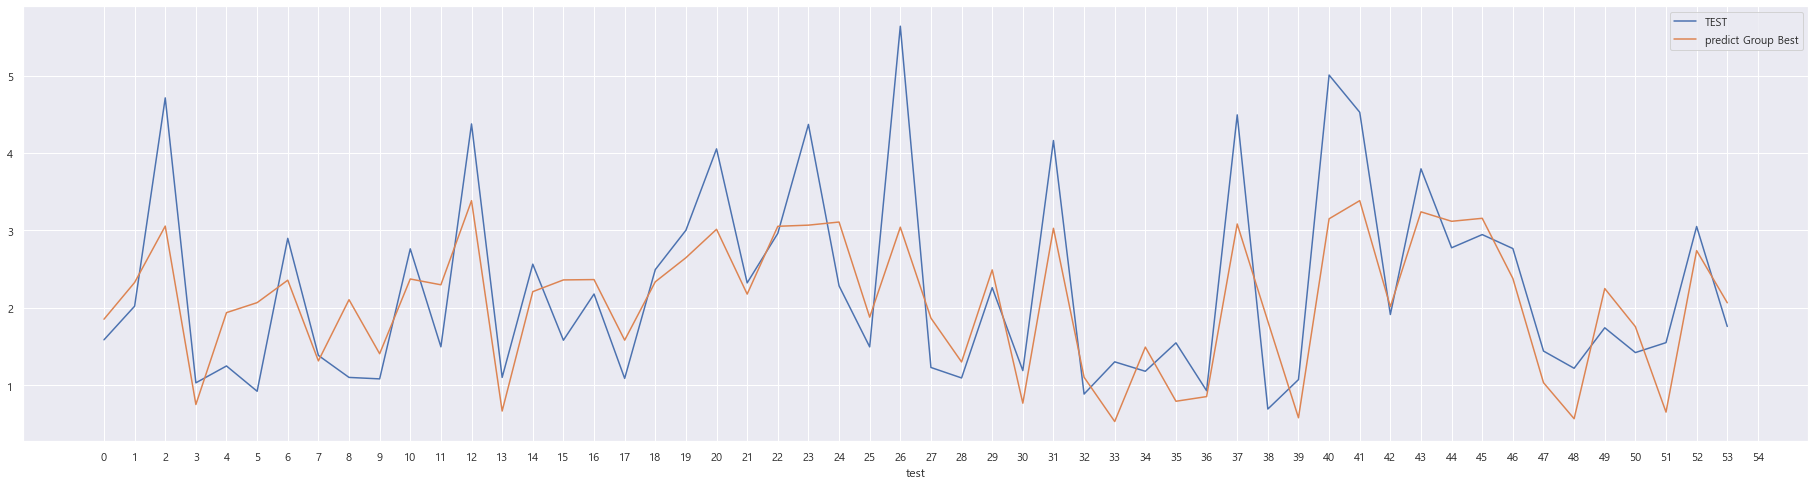

In [157]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(ye_test, label="TEST")
plt.plot(xe_pred, label="predict Group Best")
plt.legend(loc='upper right')
plt.show()

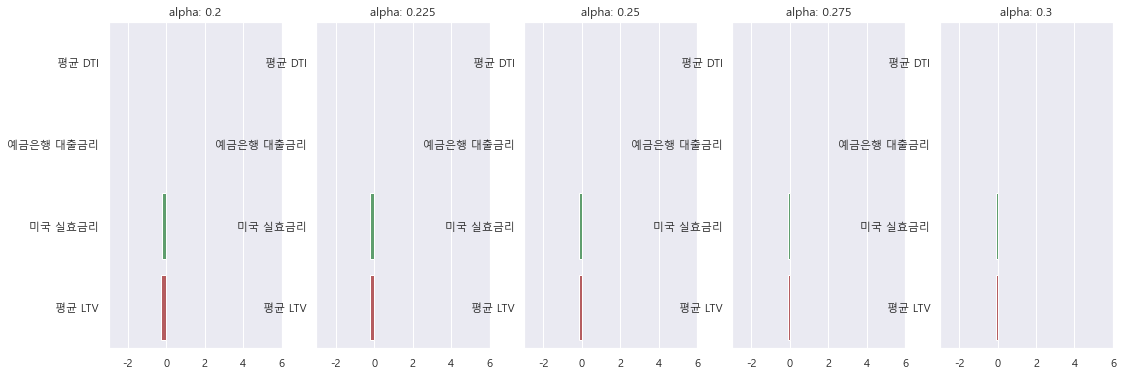

           alpha: 0.2  alpha: 0.225  alpha: 0.25  alpha: 0.275  alpha: 0.3
평균 DTI       0.000000      0.000000     0.000000      0.000000    0.000000
예금은행 대출금리   -0.032567     -0.000000    -0.000000     -0.000000   -0.000000
미국 실효금리     -0.245365     -0.198453    -0.148830     -0.102828   -0.060134
평균 LTV      -0.292810     -0.224281    -0.163905     -0.109521   -0.060220


In [119]:
alphas = [0.2, 0.225, 0.25, 0.275, 0.3]
check_coeff('elastic', feature_data_best, target, alphas)

In [110]:
feature_data_others = feature_data[['가중평균발행금리', '주택종합 매매가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '인플레이션율']]
feature_data_others

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,인플레이션율
0,0.922279,0.023902,0.000000,0.270948,0.044228,0.702174
1,0.860130,0.021056,0.015285,0.411797,0.000000,0.834290
2,0.807542,0.016809,0.036912,0.377595,0.059141,0.385088
3,0.771687,0.014553,0.036912,0.247920,0.084785,0.385088
4,0.741210,0.011992,0.036912,0.286896,0.084586,0.073353
...,...,...,...,...,...,...
209,0.011105,0.984391,0.932341,0.238626,0.857809,0.686548
210,0.010817,0.988598,0.946876,0.284627,0.866718,0.758501
211,0.005781,0.990610,0.964867,0.280079,0.881002,0.770460
212,0.000000,0.994898,0.983432,0.313914,0.865698,0.728874


In [122]:
find_best_alpha('elastic', feature_data_others[:161], target[:161])
score_checker('elastic', feature_data_others[:161], target[:161], 0.01)

Type : elastic | {'alpha': 0.01} | MSE : 0.6449465069873075 | RMSE: 0.8030856162248876
Alpha : 0.01
elastic Negative MSE score : [0.489 0.418 0.155 1.53  3.566]
elastic RMSE scores : [0.7   0.647 0.393 1.237 1.888]
elastic AVG RMSE : 0.973



In [123]:
# Other Feature Training
xf_train, xf_test, yf_train, yf_test = train_test_split(feature_data_others, target, test_size=0.25, random_state=25)
xf_model = ElasticNet(alpha=0.01, random_state=25)
xf_model.fit(xf_train, yf_train)
xf_pred = xf_model.predict(xf_test)

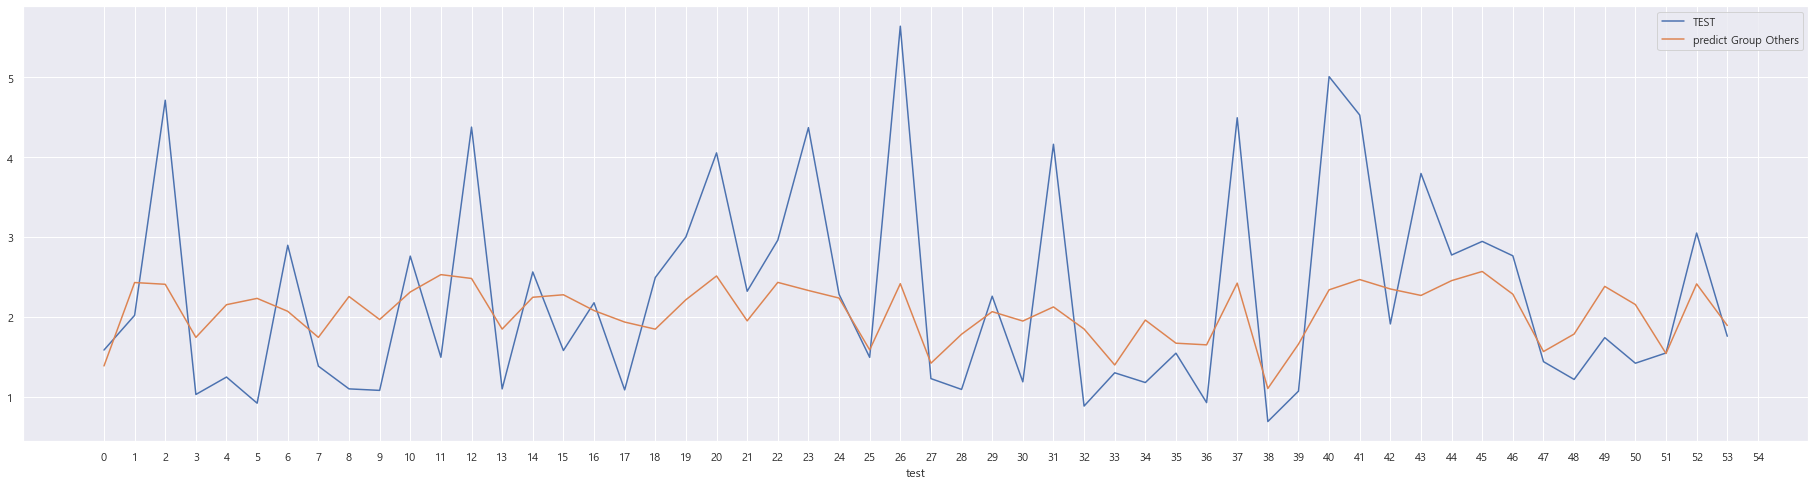

In [156]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yf_test, label="TEST")
plt.plot(xf_pred, label="predict Group Others")
plt.legend(loc='upper right')
plt.show()

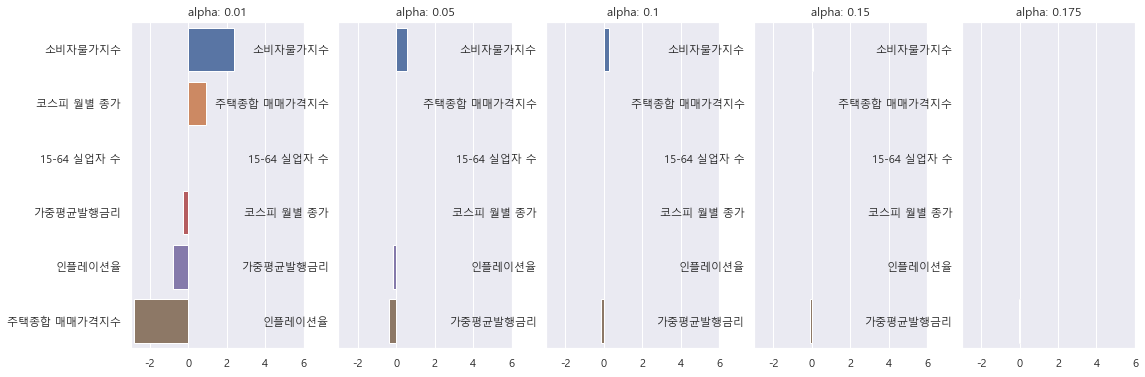

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.175
소비자물가지수         2.369769     0.545270    0.243707     0.072509      0.008035
코스피 월별 종가       0.904045     0.000000    0.000000     0.000000      0.000000
15-64 실업자 수    -0.030400     0.000000    0.000000     0.000000      0.000000
가중평균발행금리       -0.257354    -0.150519   -0.142154    -0.066327     -0.026899
인플레이션율         -0.784815    -0.349108   -0.000000    -0.000000     -0.000000
주택종합 매매가격지수    -2.817842    -0.000000   -0.000000     0.000000      0.000000


In [125]:
alphas = [0.01, 0.05, 0.1, 0.15, 0.175]
check_coeff('elastic', feature_data_others, target, alphas)

In [126]:
feature_data_real_best = feature_data[['평균 LTV', '평균 DTI', '예금은행 대출금리', '미국 실효금리', '소비자물가지수', '가중평균발행금리']]
feature_data_real_best

,평균 LTV,평균 DTI,예금은행 대출금리,미국 실효금리,소비자물가지수,가중평균발행금리
0,0.779071,0.000000,0.796034,0.188100,0.000000,0.922279
1,0.738665,0.404489,0.787312,0.232246,0.015285,0.860130
2,0.717274,0.606252,0.768107,0.264875,0.036912,0.807542
3,0.732961,0.745031,0.742334,0.299424,0.036912,0.771687
4,0.752134,0.796137,0.733051,0.328215,0.036912,0.741210
...,...,...,...,...,...,...
209,0.659152,0.149045,0.413075,0.005758,0.932341,0.011105
210,0.656930,0.153740,0.419800,0.005758,0.946876,0.010817
211,0.657576,0.149973,0.410822,0.028791,0.964867,0.005781
212,0.650819,0.141091,0.424255,0.053743,0.983432,0.000000


In [127]:
find_best_alpha('elastic', feature_data_real_best[:161], target[:161])
score_checker('elastic', feature_data_real_best[:161], target[:161], 0.01)

Type : elastic | {'alpha': 0.01} | MSE : 0.14887345391145082 | RMSE: 0.38584122889013667
Alpha : 0.01
elastic Negative MSE score : [0.601 0.118 0.105 1.178 3.354]
elastic RMSE scores : [0.775 0.344 0.323 1.085 1.831]
elastic AVG RMSE : 0.872



In [128]:
# real best Feature Training
xg_train, xg_test, yg_train, yg_test = train_test_split(feature_data_real_best, target, test_size=0.25, random_state=25)
xg_model = ElasticNet(alpha=0.01, random_state=25)
xg_model.fit(xg_train, yg_train)
xg_pred = xg_model.predict(xg_test)

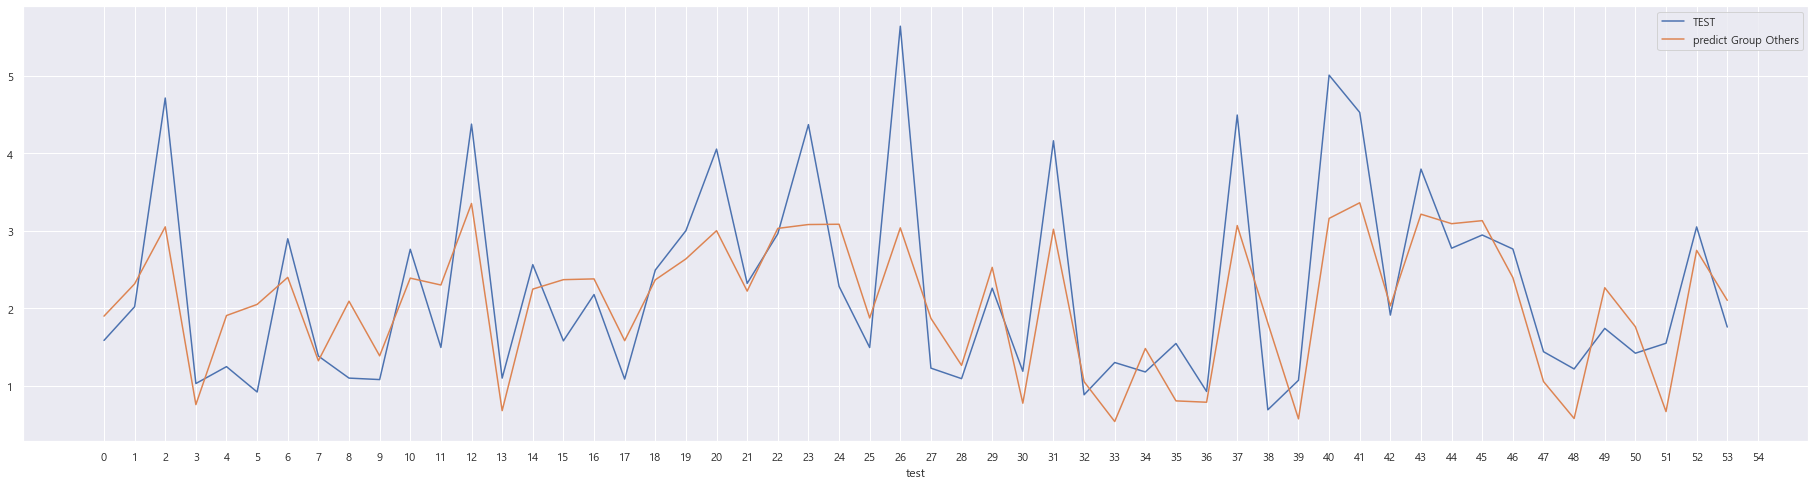

In [155]:
xs = data_a.index.to_list()


fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yg_test, label="TEST")
plt.plot(xg_pred, label="predict Group Others")
plt.legend(loc='upper right')
plt.show()

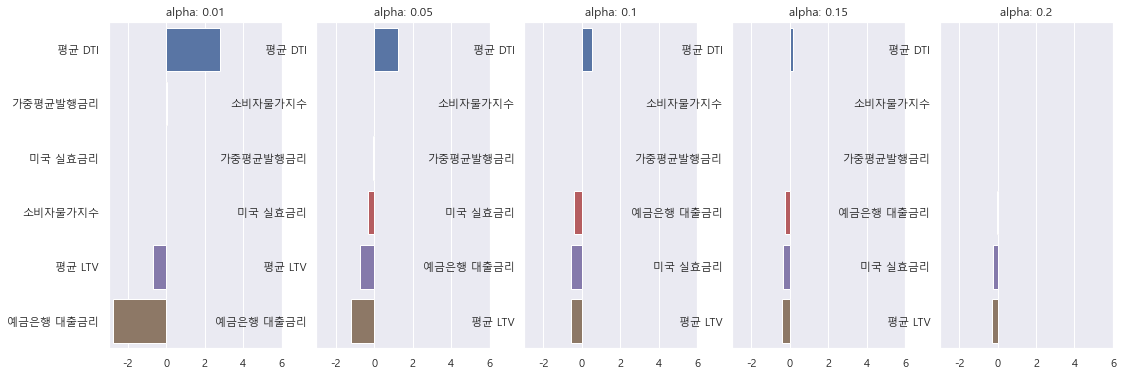

           alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
평균 DTI        2.792371     1.231218    0.531445     0.195663    0.000000
가중평균발행금리      0.017526    -0.053988   -0.000000    -0.000000   -0.000000
미국 실효금리      -0.000000    -0.342922   -0.389596    -0.327151   -0.245365
소비자물가지수      -0.000000     0.000000    0.000000     0.000000    0.000000
평균 LTV       -0.701486    -0.730373   -0.573154    -0.422978   -0.292810
예금은행 대출금리    -2.789327    -1.192874   -0.558274    -0.230501   -0.032567


In [132]:
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]
check_coeff('elastic', feature_data_real_best, target, alphas)

In [225]:
# 최종검증
from sklearn.metrics import mean_squared_error

mse_a = mean_squared_error(ya_test, xa_pred)
rmse_a = mse_a ** 0.5

mse_b = mean_squared_error(yb_test, xb_pred)
rmse_b = mse_b ** 0.5

mse_c = mean_squared_error(yc_test, xc_pred)
rmse_c = mse_c ** 0.5

mse_all = mean_squared_error(yd_test, xd_pred)
rmse_all = mse_all ** 0.5

mse_best = mean_squared_error(ye_test, xe_pred)
rmse_best = mse_best ** 0.5

mse_others = mean_squared_error(yf_test, xf_pred)
rmse_others = mse_others ** 0.5

mse_real_best = mean_squared_error(yg_test, xg_pred)
rmse_real_best = mse_real_best ** 0.5

print(f'금리 요인 RMSE : {rmse_a:.3f}')
print(f'부동산 요인 RMSE : {rmse_b:.3f}')
print(f'거시경제 요인 RMSE : {rmse_c:.3f}')
print(f'전체 요인 RMSE : {rmse_all:.3f}')
print(f'전체 요인 중 가장 영향력 높은 RMSE : {rmse_best:.3f}')
print(f'영향력 높은 요인을 제외한 나머지 RMSE : {rmse_others:.3f}')
print(f'상환율에 영향을 준다고 판단된 요인 RMSE : {rmse_real_best:.3f}')

금리 요인 RMSE : 1.120
부동산 요인 RMSE : 1.015
거시경제 요인 RMSE : 1.231
전체 요인 RMSE : 0.864
전체 요인 중 가장 영향력 높은 RMSE : 0.792
영향력 높은 요인을 제외한 나머지 RMSE : 1.096
상환율에 영향을 준다고 판단된 요인 RMSE : 0.790


In [249]:
# R2 확인 - OLS 분석
import statsmodels.api as sm

lm = sm.OLS(list(target), feature_data_best)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              305.5
Date:                Thu, 25 Aug 2022   Prob (F-statistic):                    2.63e-86
Time:                        17:15:45   Log-Likelihood:                         -293.31
No. Observations:                 214   AIC:                                      594.6
Df Residuals:                     210   BIC:                                      608.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균 LTV         1.3979      0.252      5.538      0.000       0.900       1.896
평균 DTI         5.4041      0.273     19.769      0.000       4.865       5.943
예금은행 대출금리     -3.8481      0.371    -10.362      0.000      -4.580      -3.116
미국 실효금리       -0.6926      0.336     -2.060      0.041      -1.355      -0.030
==============================================================================
Omnibus:                       62.181   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.071
Skew:                           0.902   Prob(JB):                     4.98e-93
Kurtosis:                       9.665   Cond. No.                         7.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
# 데이터 프레임 만들 때 df.index.name = XX 지정 안 했으면 이름이 없어요
# 이름 넣고 싶으면 별도로 리스트 만들어서 지정해주던가 처음부터 만들어주세요

datas = [feature_data, feature_data_A, feature_data_B, feature_data_C]
names = ['feature_all', 'feature_A', 'feature_B', 'feature_C']
num = range(1,len(datas)+1)

### >> for문에 들어가는 변수의 위치(feature_data는 0)도 VIF출력할 때 번호 붙여서 같이 출력(근데 번호는 1부터 시작하고 싶음)
### 요인들 번호 매기고 VIF 출력
for num, data in zip(num, datas):
        datas[num-1].index.name = names[num-1]
        print(f'번호 {num} - 데이터 이름 {datas[num-1].index.name}')
        find_vif(data)
        print(' ')

번호 1 - 데이터 이름 feature_all
    VIF Factor     features
0   247.579266      소비자물가지수
1   169.667705  주택종합 매매가격지수
2   124.347743         CD금리
3    97.544781    예금은행 대출금리
4    96.017723    코스피 월별 종가
5    51.030699     가중평균발행금리
6    47.691013       평균 DTI
7    17.435485       평균 LTV
8    16.309239      미국 실효금리
9     9.462446       인플레이션율
10    7.589399  15-64 실업자 수
 
번호 2 - 데이터 이름 feature_A
   VIF Factor   features
0   24.645098  예금은행 대출금리
1   24.338242   가중평균발행금리
2    1.980578    미국 실효금리
 
번호 3 - 데이터 이름 feature_B
   VIF Factor     features
0    2.659064       평균 LTV
1    2.375083       평균 DTI
2    2.321795  주택종합 매매가격지수
 
번호 4 - 데이터 이름 feature_C
   VIF Factor     features
0    7.141412    코스피 월별 종가
1    5.110120       인플레이션율
2    4.081643  15-64 실업자 수
 


In [275]:
from test_package import alpha_master, find_best_alpha

### 75% 수준의 데이터만 가지고 돌렸을 때
datas = [feature_data, feature_data_A, feature_data_B, feature_data_C]
names = ['feature_all', 'feature_A', 'feature_B', 'feature_C']
types = ['ridge', 'lasso', 'elastic']
num = range(1,len(datas)+1)

# ### >> 모델 하나의 알파값을 구하는데 포문으로 모든 요인변수 돌리고나서 다 끝나면 다른 모델 넣어서 반복
# ### 모든 변수를 모델에 대입했을 때 최적의 앒파값 구하기
# for type in types:
#     print(" ")
#     print(type)

for num, data in zip(num, datas):
    datas[num-1].index.name = names[num-1]
    print(datas[num-1].index.name)
    for i in range(0, len(types)):
        alpha_master(types[i], data[:161], target[:161])

### 여기에 요인변수랑 모델이랑 이 함수에 넣고 돌렸을 때 나오는 최적의 알파값을
### 이 다음 코드에 변수와 모델에 맞게 대입해서 최적의 RMSE를 한번에 구하고 싶음
### find_best_alpha + score_checker
### alpha_master('elastic', feature_data, target)

feature_all
Type : ridge | {'alpha': 1.0} | MSE : 0.30841606969261975 | RMSE: 0.5553522032842039
Alpha : 1.0
ridge Negative MSE score : [0.685 0.166 0.091 1.168 3.938]
ridge RMSE scores : [0.827 0.407 0.302 1.081 1.984]
ridge AVG RMSE : 0.920

Type : lasso | {'alpha': 0.01} | MSE : 0.06620879795201255 | RMSE: 0.25731070314313115
Alpha : 0.01
lasso Negative MSE score : [0.693 0.051 0.071 1.077 3.373]
lasso RMSE scores : [0.832 0.226 0.266 1.038 1.837]
lasso AVG RMSE : 0.840

Type : elastic | {'alpha': 0.01} | MSE : 0.07522351608721681 | RMSE: 0.2742690578377678
Alpha : 0.01
elastic Negative MSE score : [0.561 0.097 0.078 1.159 3.589]
elastic RMSE scores : [0.749 0.311 0.279 1.077 1.894]
elastic AVG RMSE : 0.862

feature_A
Type : ridge | {'alpha': 1.0} | MSE : 0.3398030304538878 | RMSE: 0.5829262650231912
Alpha : 1.0
ridge Negative MSE score : [0.665 0.155 0.168 1.431 3.144]
ridge RMSE scores : [0.816 0.394 0.41  1.196 1.773]
ridge AVG RMSE : 0.918

Type : lasso | {'alpha': 0.02} | MSE :